# Subclustering of Post. endo./Hindgut/Ecto. PS14 in Set2

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set2/seu_HQC2_Set2.obj')
seu_HQC

An object of class Seurat 
28364 features across 4897 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


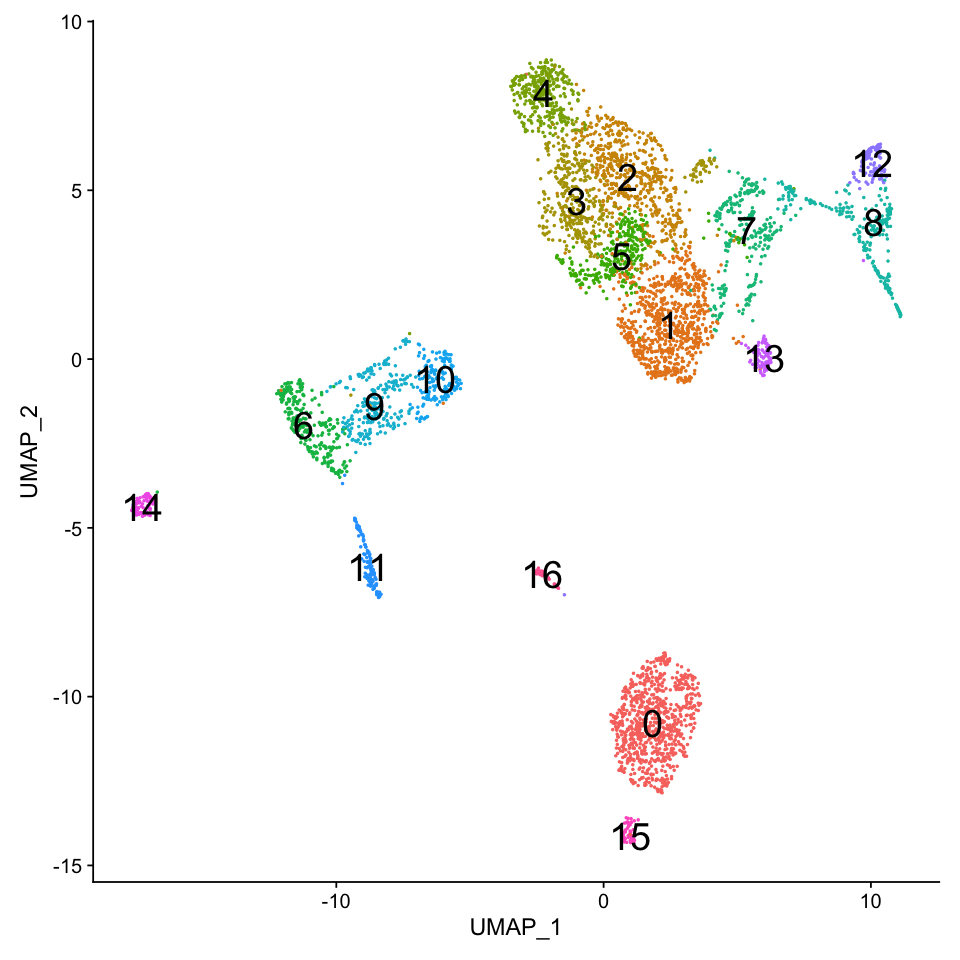

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

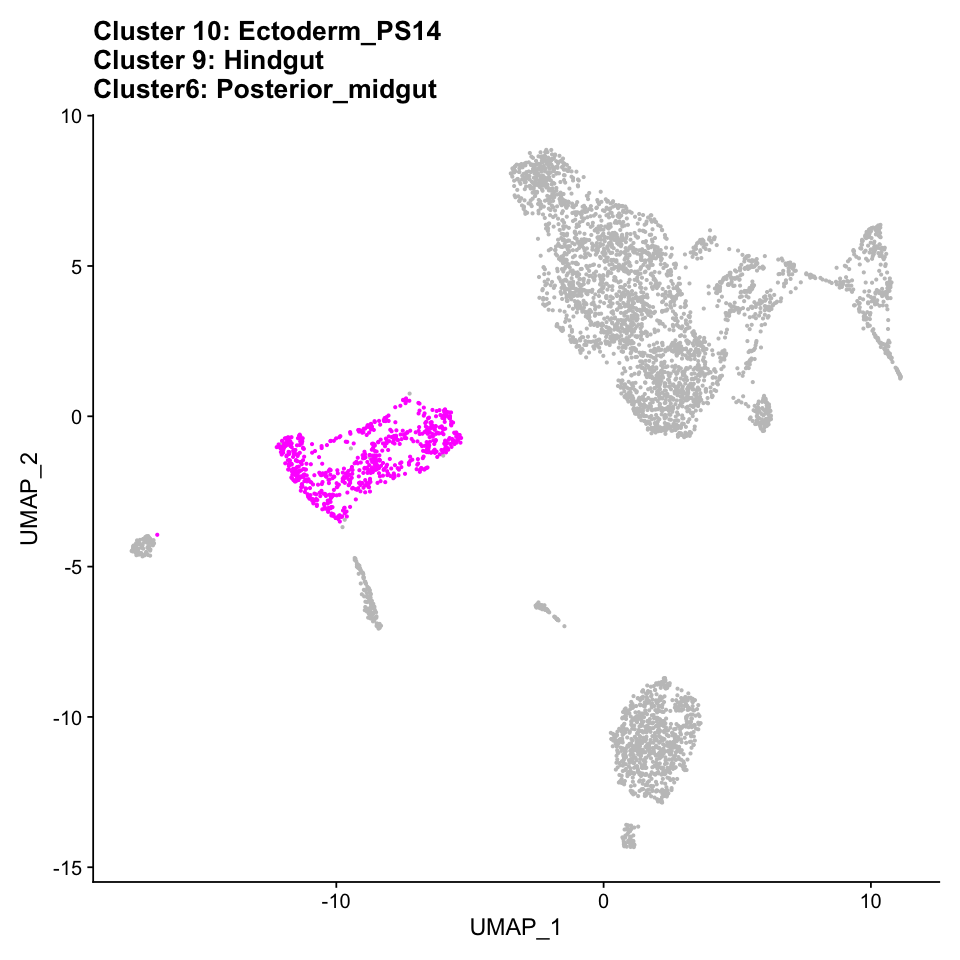

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(10,9,6))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 10: Ectoderm_PS14\nCluster 9: Hindgut\nCluster6: Posterior_midgut')

In [5]:
seu.post <- subset(seu_HQC, idents = c(10,9,6))
seu.post

An object of class Seurat 
28364 features across 677 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
seu.post$cluster.allcell <- seu.post$seurat_clusters

## Re-normalize and clustering

In [7]:
DefaultAssay(seu.post) <- "RNA"
seu.post <- suppressWarnings(SCTransform(seu.post, vars.to.regress = c("percent.mt", "percent.rRNA")))

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8469 by 677

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 677 cells



  |======================================================================| 100%


Found 133 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8469 genes



  |======================================================================| 100%


Computing corrected count matrix for 8469 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 8.860673 secs

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt, percent.rRNA

Centering data matrix

Set default assay to SCT



PC_ 1 
Positive:  ps, Pdp1, ImpE2, fkh, Oatp74D, CG2930, Myc, DNaseII, smal, MFS14 
	   Gmap, mnd, Fas2, aay, srp, fog, Pepck-CG45087, Tis11, peb, Nplp2 
	   CG32053, NimC4, Thor, cv-c, Ndae1, RapGAP1, Ptx1, hkb, Mes2, sas 
Negative:  salm, ken, Abd-B, Blimp-1, ftz, trn, Brd, toc, wech, lncRNA:iab8 
	   5-HT2A, wb, robo2, stg, BobA, Antp, chrb, dan, dpn, D 
	   scyl, ptc, SoxN, Ppa, opa, CG10035, E(spl)m5-HLH, Tollo, prd, E(spl)m7-HLH 
PC_ 2 
Positive:  CG13427, cv-2, Doc1, klg, Ama, CG10035, CG45263, salm, side-V, Atx-1 
	   CG4440, egr, tup, Doc2, Lac, CG8960, Doc3, CG42342, RpL27A, wun2 
	   ken, phu, h, wg, CG14915, Blimp-1, tsr, RpS23, Dtg, run 
Negative:  sog, Dl, bun, Ndae1, CG16758, Kr, CG2930, cv-c, lncRNA:roX1, Pdp1 
	   Mdr49, E(spl)m7-HLH, E(spl)m4-BFM, Tis11, Oatp74D, Tet, CG9005, scyl, drm, sim 
	   Myc, rhea, RapGAP1, Thor, kis, srp, brk, l(3)neo38, E(spl)m5-HLH, ps 
PC_ 3 
Positive:  hth, ftz, opa, ps, trn, ImpE2, fz2, dan, smal, ken 
	   Abd-B, Antp, prd, peb, SoxN, aa

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 677
Number of edges: 25695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6791
Number of communities: 6
Elapsed time: 0 seconds


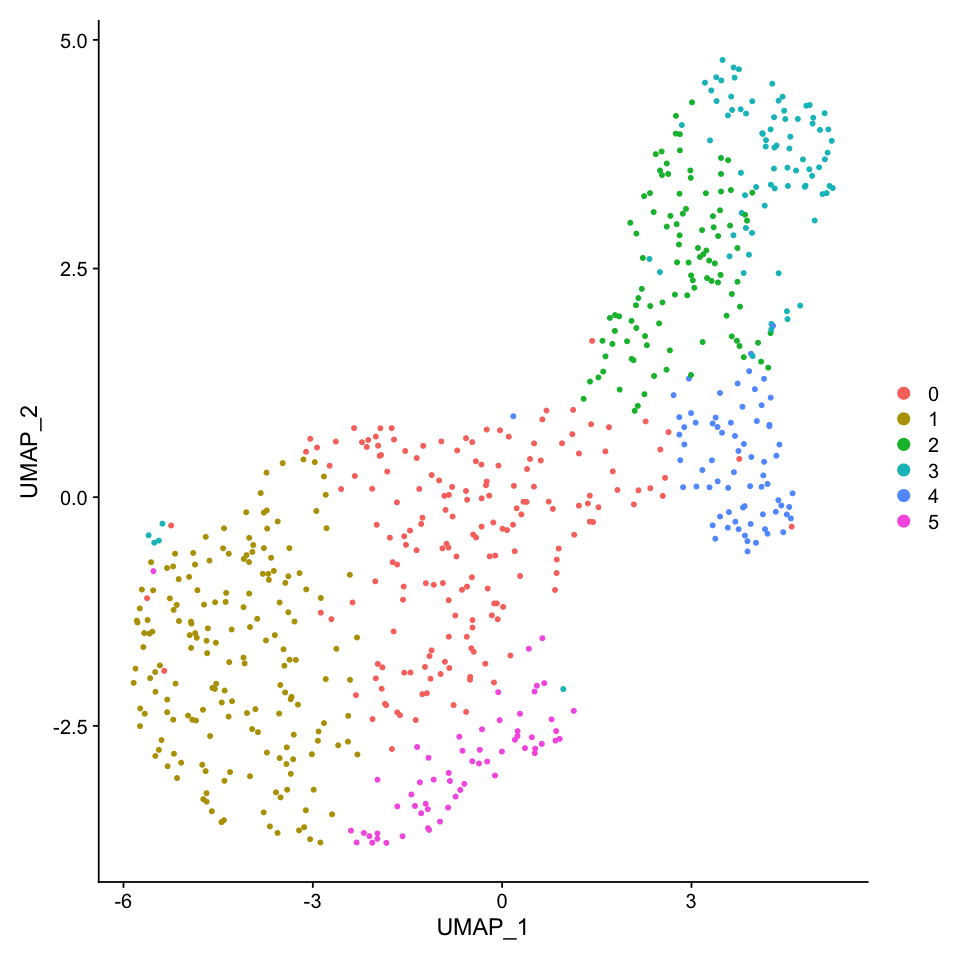

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- RunPCA(seu.post)
seu.post <- RunUMAP(seu.post, dims = 1:30)
seu.post <- FindNeighbors(seu.post, dims = 1:30)
seu.post <- FindClusters(seu.post)
DimPlot(seu.post, reduction = 'umap')

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 677
Number of edges: 25695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5340
Number of communities: 10
Elapsed time: 0 seconds


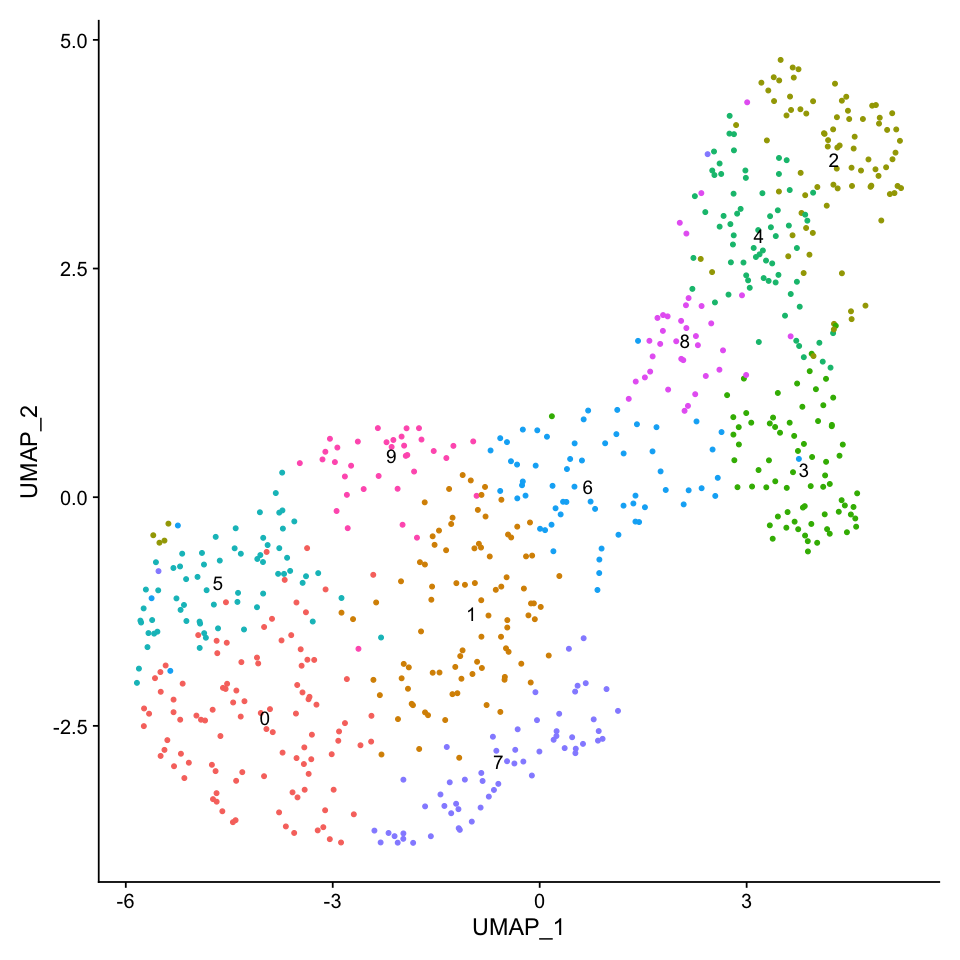

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- FindClusters(seu.post, resolution = 1.7)
DimPlot(seu.post, reduction = 'umap', label = TRUE) + NoLegend()

In [10]:
levels(seu.post) <- c(5,0,9,1,7,6,8,3,4,2)
all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster 5

Calculating cluster 0

Calculating cluster 9

Calculating cluster 1

Calculating cluster 7

Calculating cluster 6

Calculating cluster 8

Calculating cluster 3

Calculating cluster 4

Calculating cluster 2



[1] 1424

[1] 100

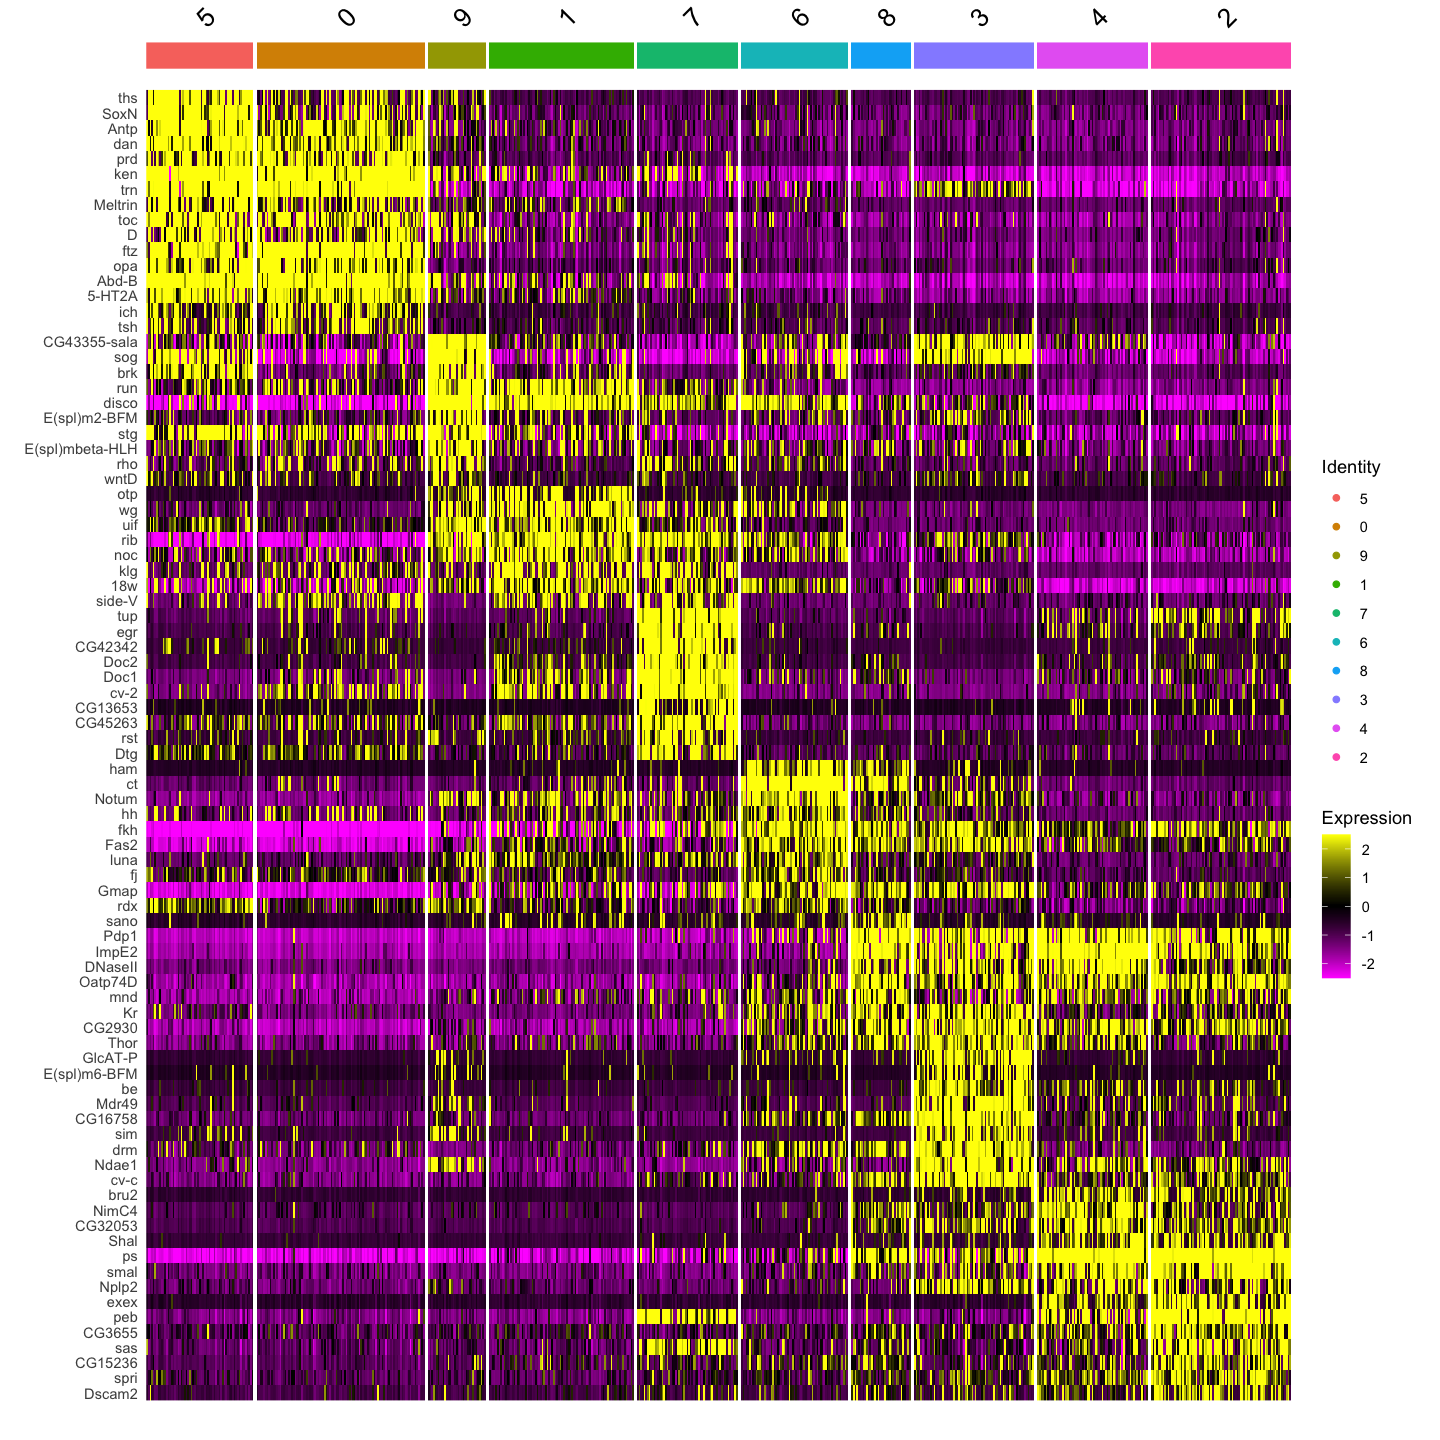

In [11]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))

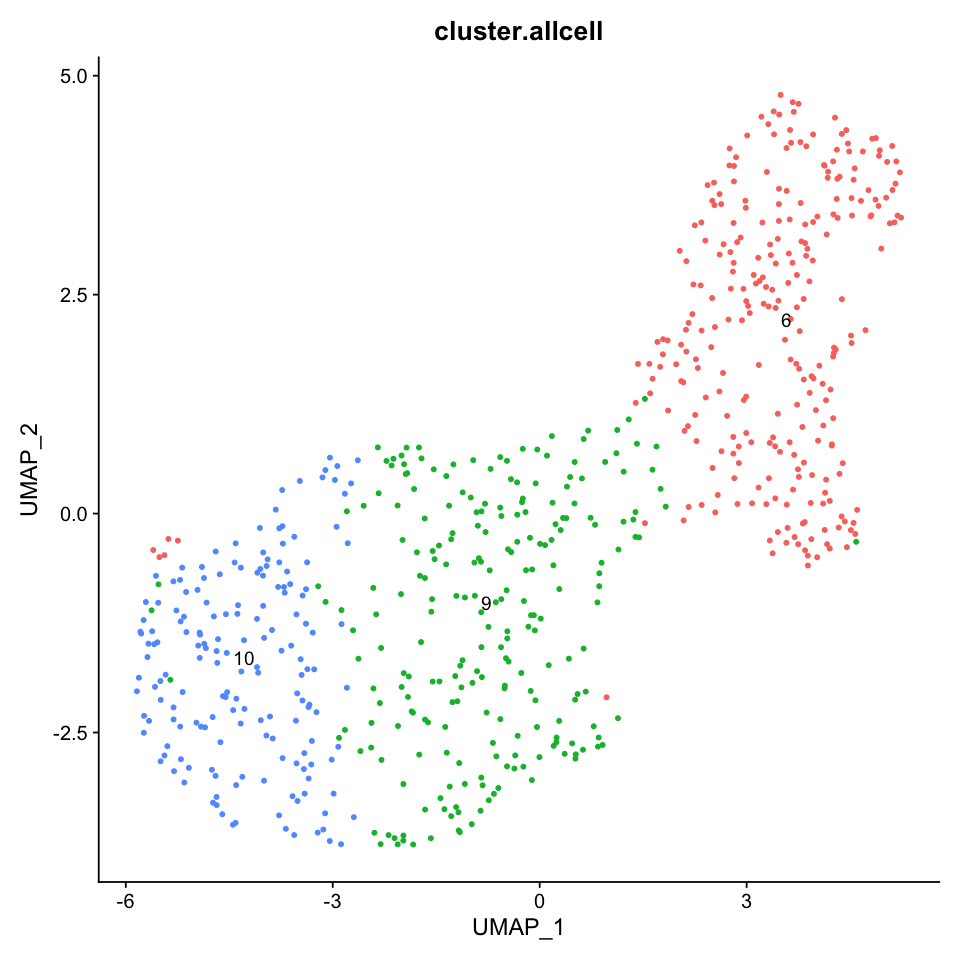

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = TRUE, group.by='cluster.allcell') + NoLegend()

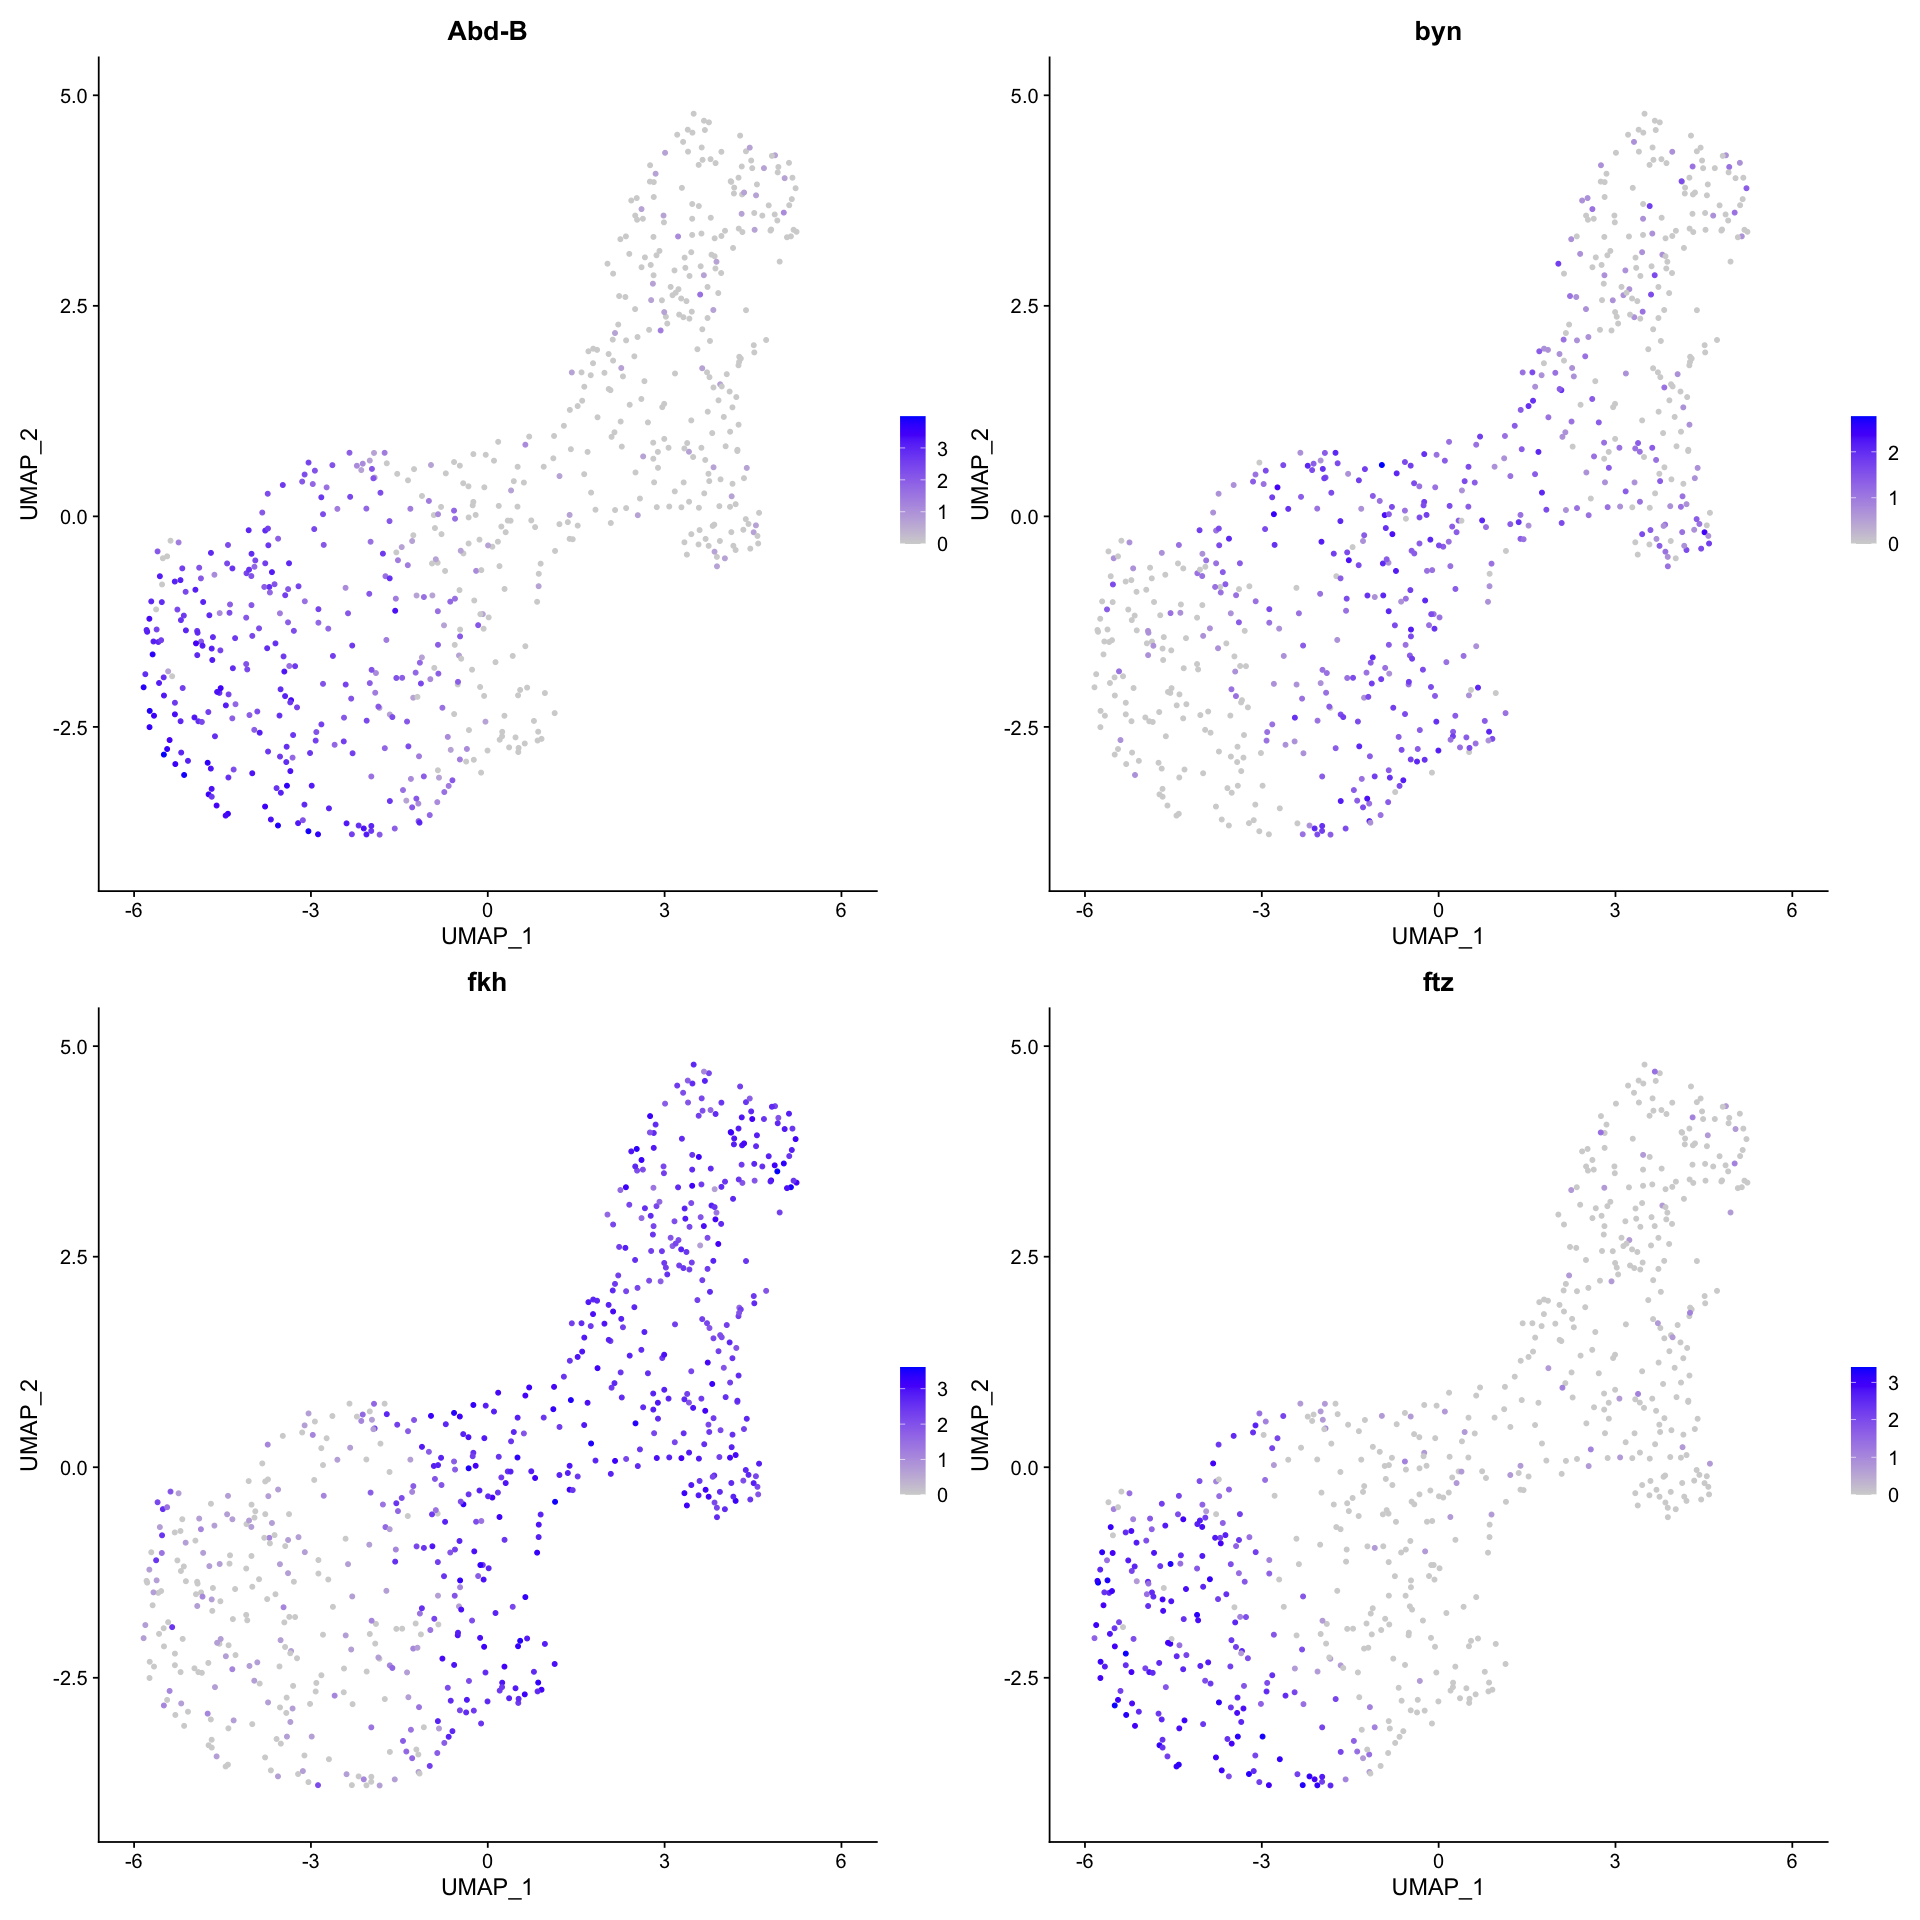

In [13]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("Abd-B", "byn", "fkh", "ftz"), pt.size = 1,  ncol = 2)

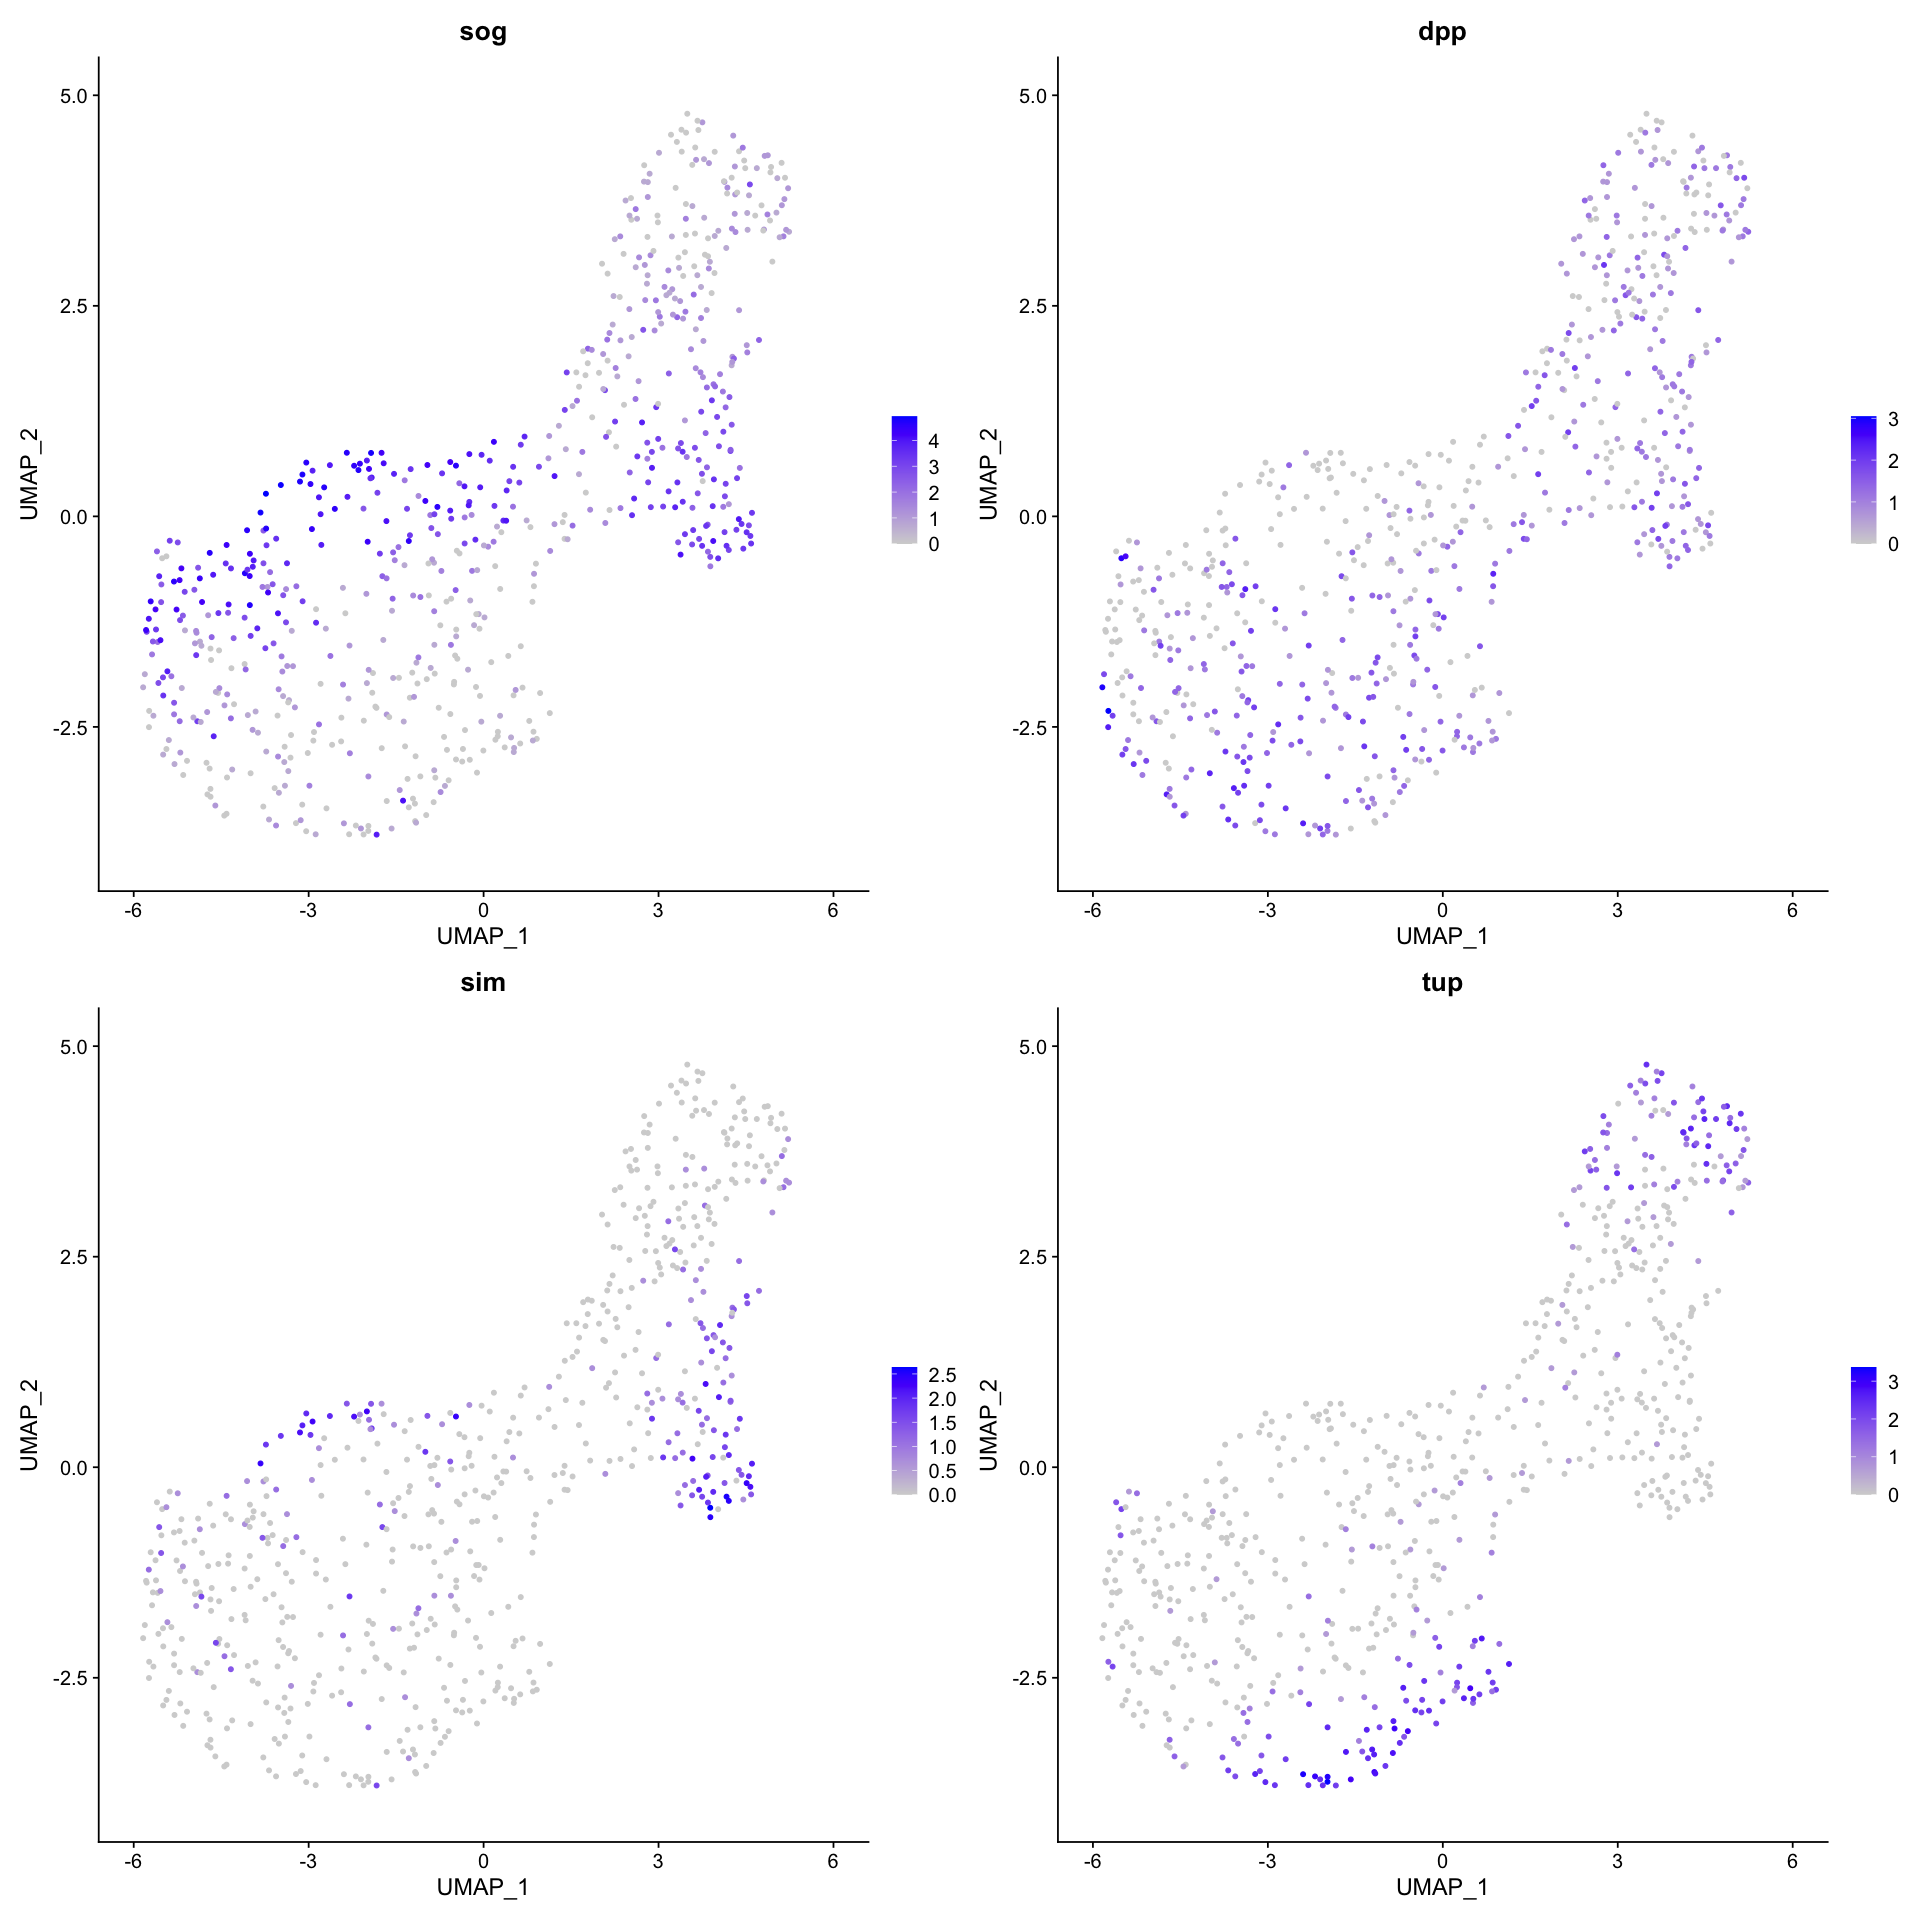

In [14]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("sog", "dpp", "sim", "tup"), pt.size = 1,  ncol = 2)

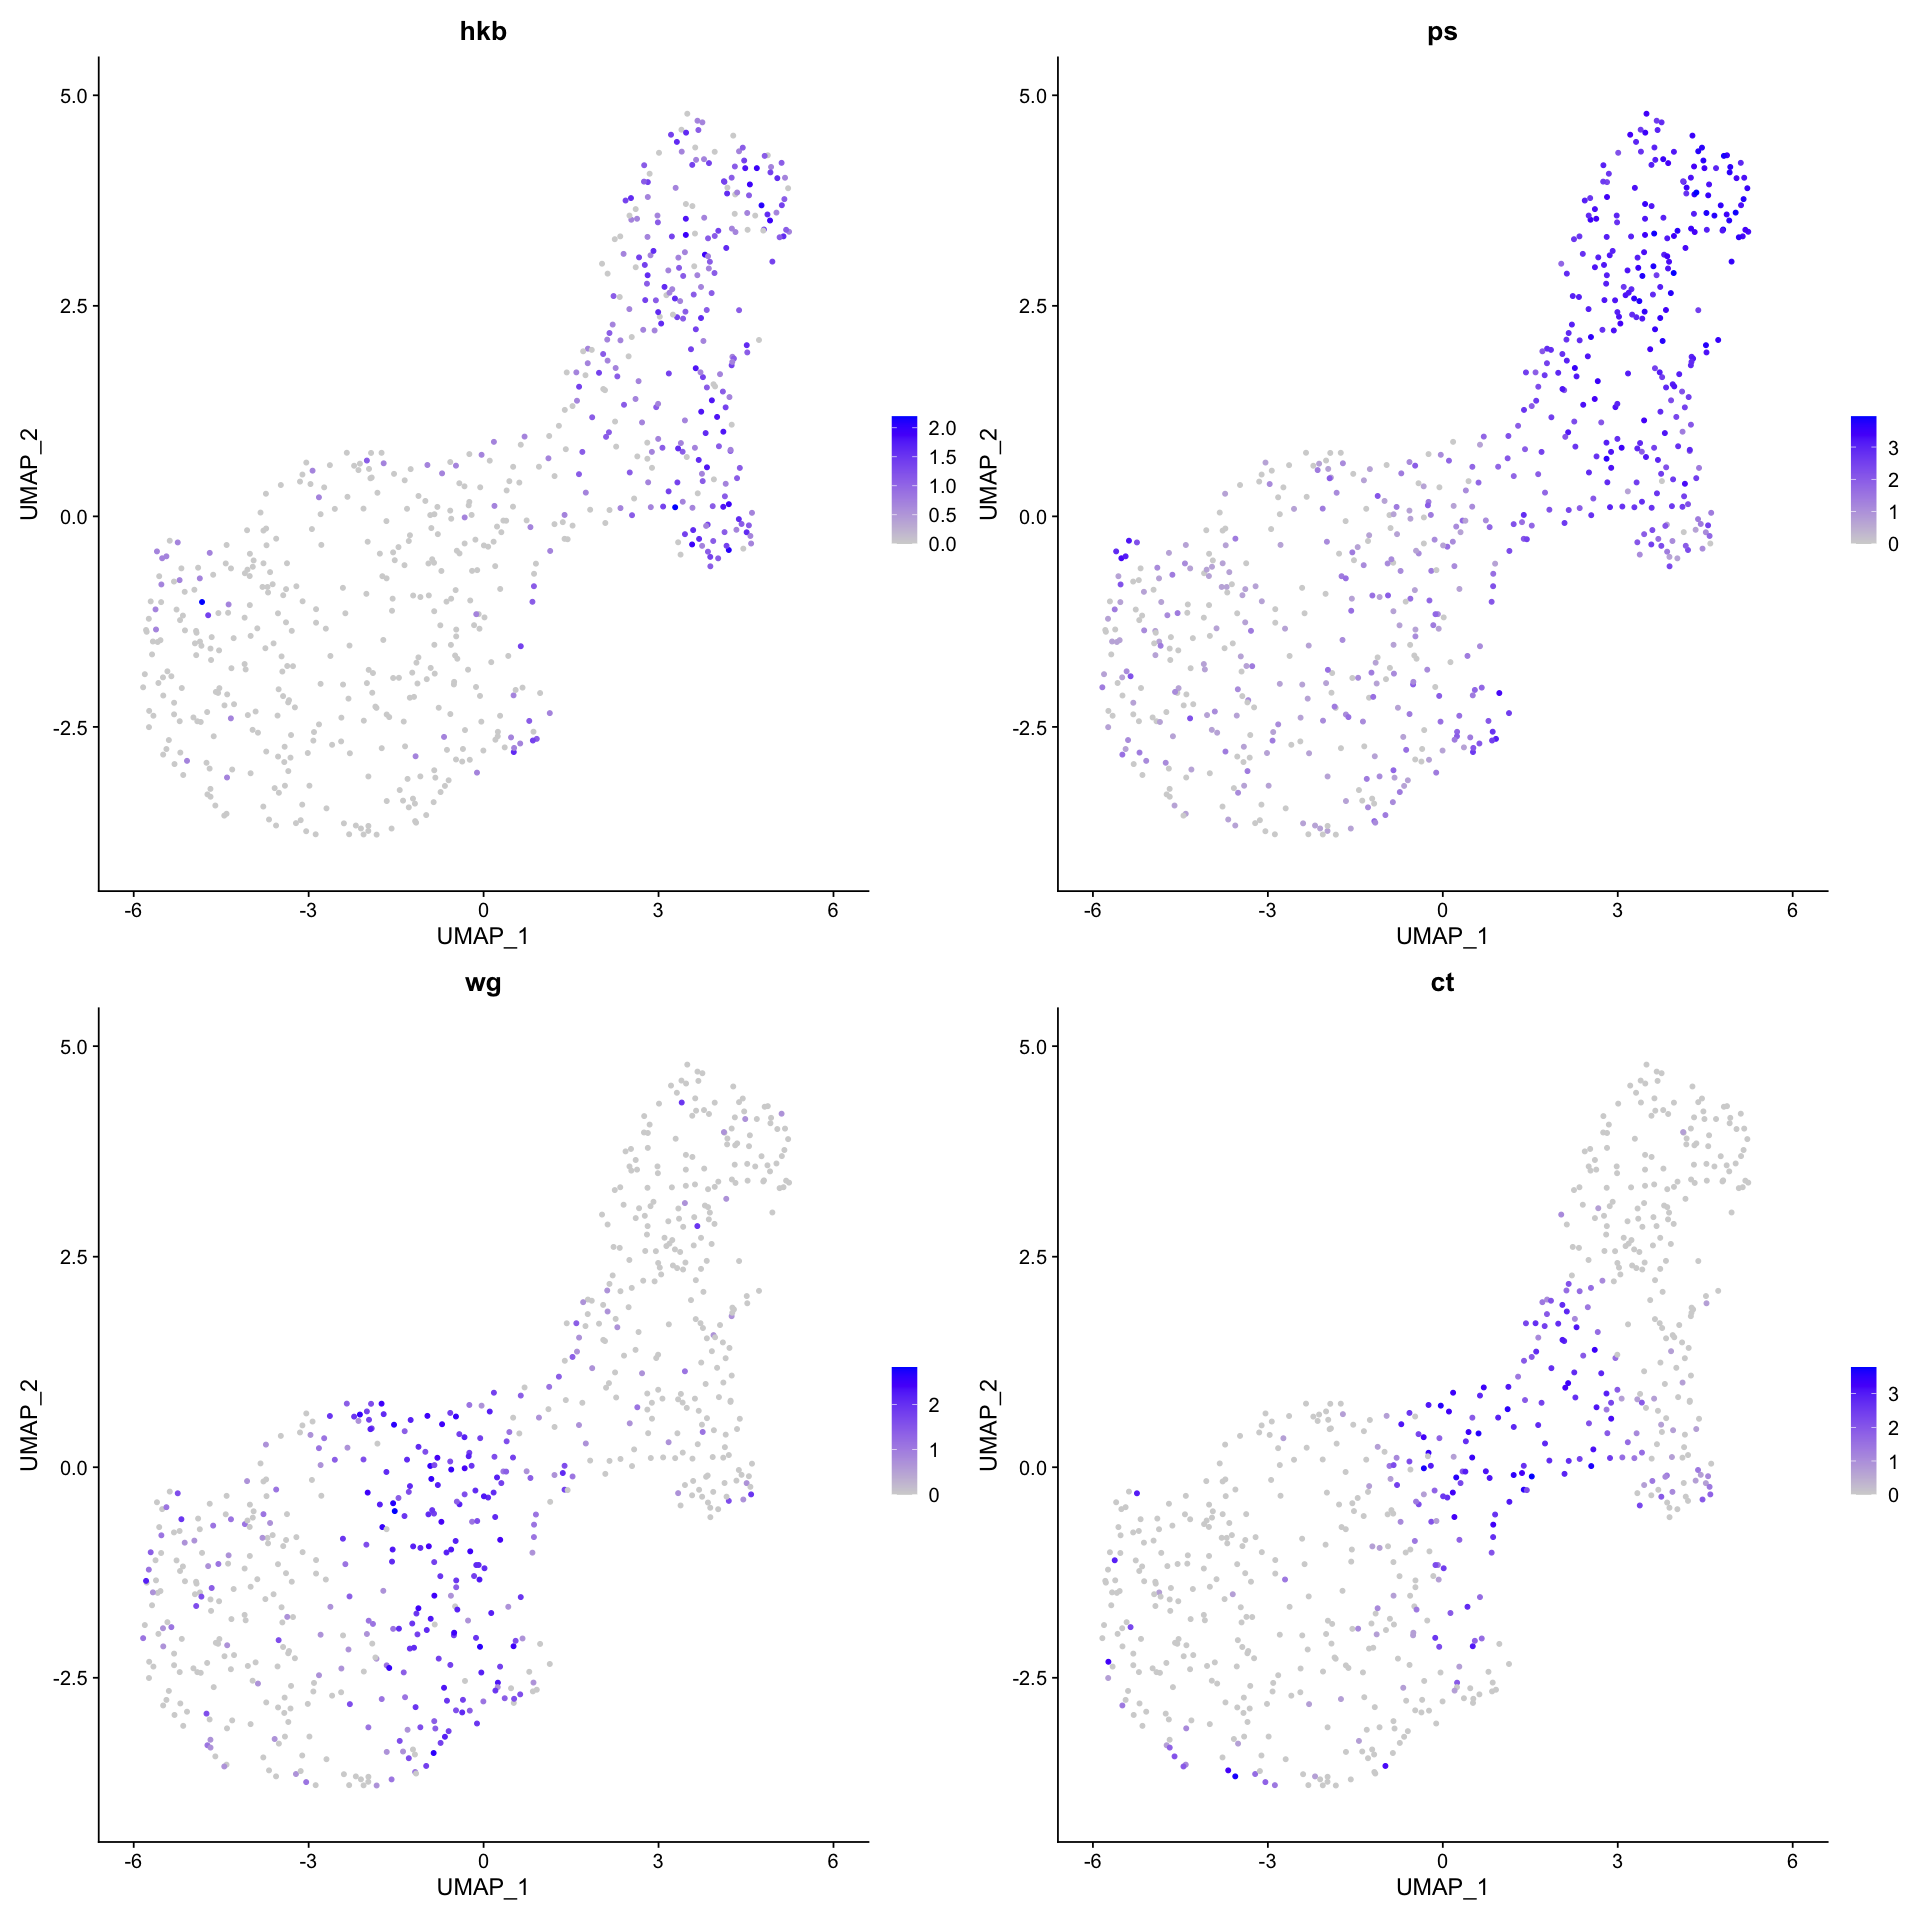

In [15]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.post, reduction = "umap", features = c("hkb", "ps", "wg", "ct"), pt.size = 1,  ncol = 2)

## Add annotation

In [16]:
manual_id <- as.data.frame(seu.post$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)

manual_id$manual_ID <- gsub("1", "aaa", manual_id$manual_ID) 
manual_id$manual_ID <- gsub("4", "endoderm_postMG_lateral", manual_id$manual_ID) #hkb+
manual_id$manual_ID <- gsub("aaa", "ectoderm_PS14/hindgut_dorsal", manual_id$manual_ID) #byn+ #Abd-B+
manual_id$manual_ID <- gsub("0", "ectoderm_PS14_dorsal", manual_id$manual_ID) #byn+, sog-
manual_id$manual_ID <- gsub("2", "endoderm_postMG_dorsal", manual_id$manual_ID) #hkb+, tup+
manual_id$manual_ID <- gsub("3", "endoderm_postMG_ventral", manual_id$manual_ID) #hkb+, sim+
manual_id$manual_ID <- gsub("5", "ectoderm_PS14_ventral", manual_id$manual_ID) #byn+
manual_id$manual_ID <- gsub("6", "ectoderm_hindgut_ventral", manual_id$manual_ID) #byn+
manual_id$manual_ID <- gsub("7", "ectoderm_hindgut_dorsal", manual_id$manual_ID) #byn+, tup+
manual_id$manual_ID <- gsub("8", "endoderm_postMG_lateral", manual_id$manual_ID) #hkb+
manual_id$manual_ID <- gsub("9", "ectoderm_PS14/hindgut_ventral", manual_id$manual_ID) #byn+ #Abd-B+, #sog+
head(manual_id)

manual_ID
AAACCCACACTTGGCG 7        
AAACGCTTCCGATAGT 3        
AAAGAACGTAATGCTC 0        
AAAGAACGTTACACAC 6        
AACAAGATCACCTTAT 8        
AACACACGTTTCAGAC 1

manual_ID                   
AAACCCACACTTGGCG ectoderm_hindgut_dorsal     
AAACGCTTCCGATAGT endoderm_postMG_ventral     
AAAGAACGTAATGCTC ectoderm_PS14_dorsal        
AAAGAACGTTACACAC ectoderm_hindgut_ventral    
AACAAGATCACCTTAT endoderm_postMG_lateral     
AACACACGTTTCAGAC ectoderm_PS14/hindgut_dorsal

In [17]:
seu.post$manual_ID <- manual_id$manual_ID

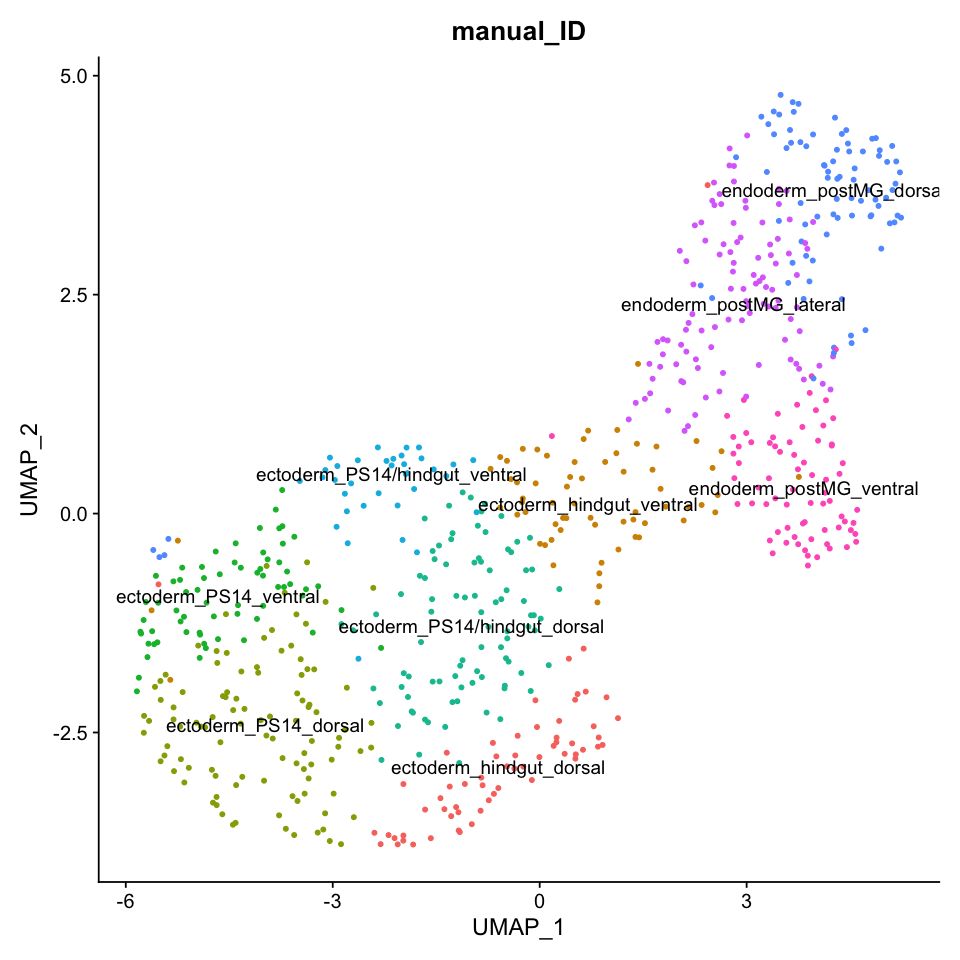

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.post, reduction = 'umap', label = TRUE, group.by = 'manual_ID') + NoLegend()

In [20]:
Idents(seu.post) <- 'manual_ID'
levels(seu.post) <- c('ectoderm_PS14_ventral','ectoderm_PS14_dorsal',
                     'ectoderm_PS14/hindgut_ventral','ectoderm_PS14/hindgut_dorsal',
                     'ectoderm_hindgut_ventral','ectoderm_hindgut_dorsal',
                     'endoderm_postMG_ventral','endoderm_postMG_lateral','endoderm_postMG_dorsal')

all.markers.post <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers.post)
all.markers.post.top10 <- all.markers.post %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.post.top10)

Calculating cluster ectoderm_PS14_ventral

Calculating cluster ectoderm_PS14_dorsal

Calculating cluster ectoderm_PS14/hindgut_ventral

Calculating cluster ectoderm_PS14/hindgut_dorsal

Calculating cluster ectoderm_hindgut_ventral

Calculating cluster ectoderm_hindgut_dorsal

Calculating cluster endoderm_postMG_ventral

Calculating cluster endoderm_postMG_lateral

Calculating cluster endoderm_postMG_dorsal



[1] 1275

[1] 90

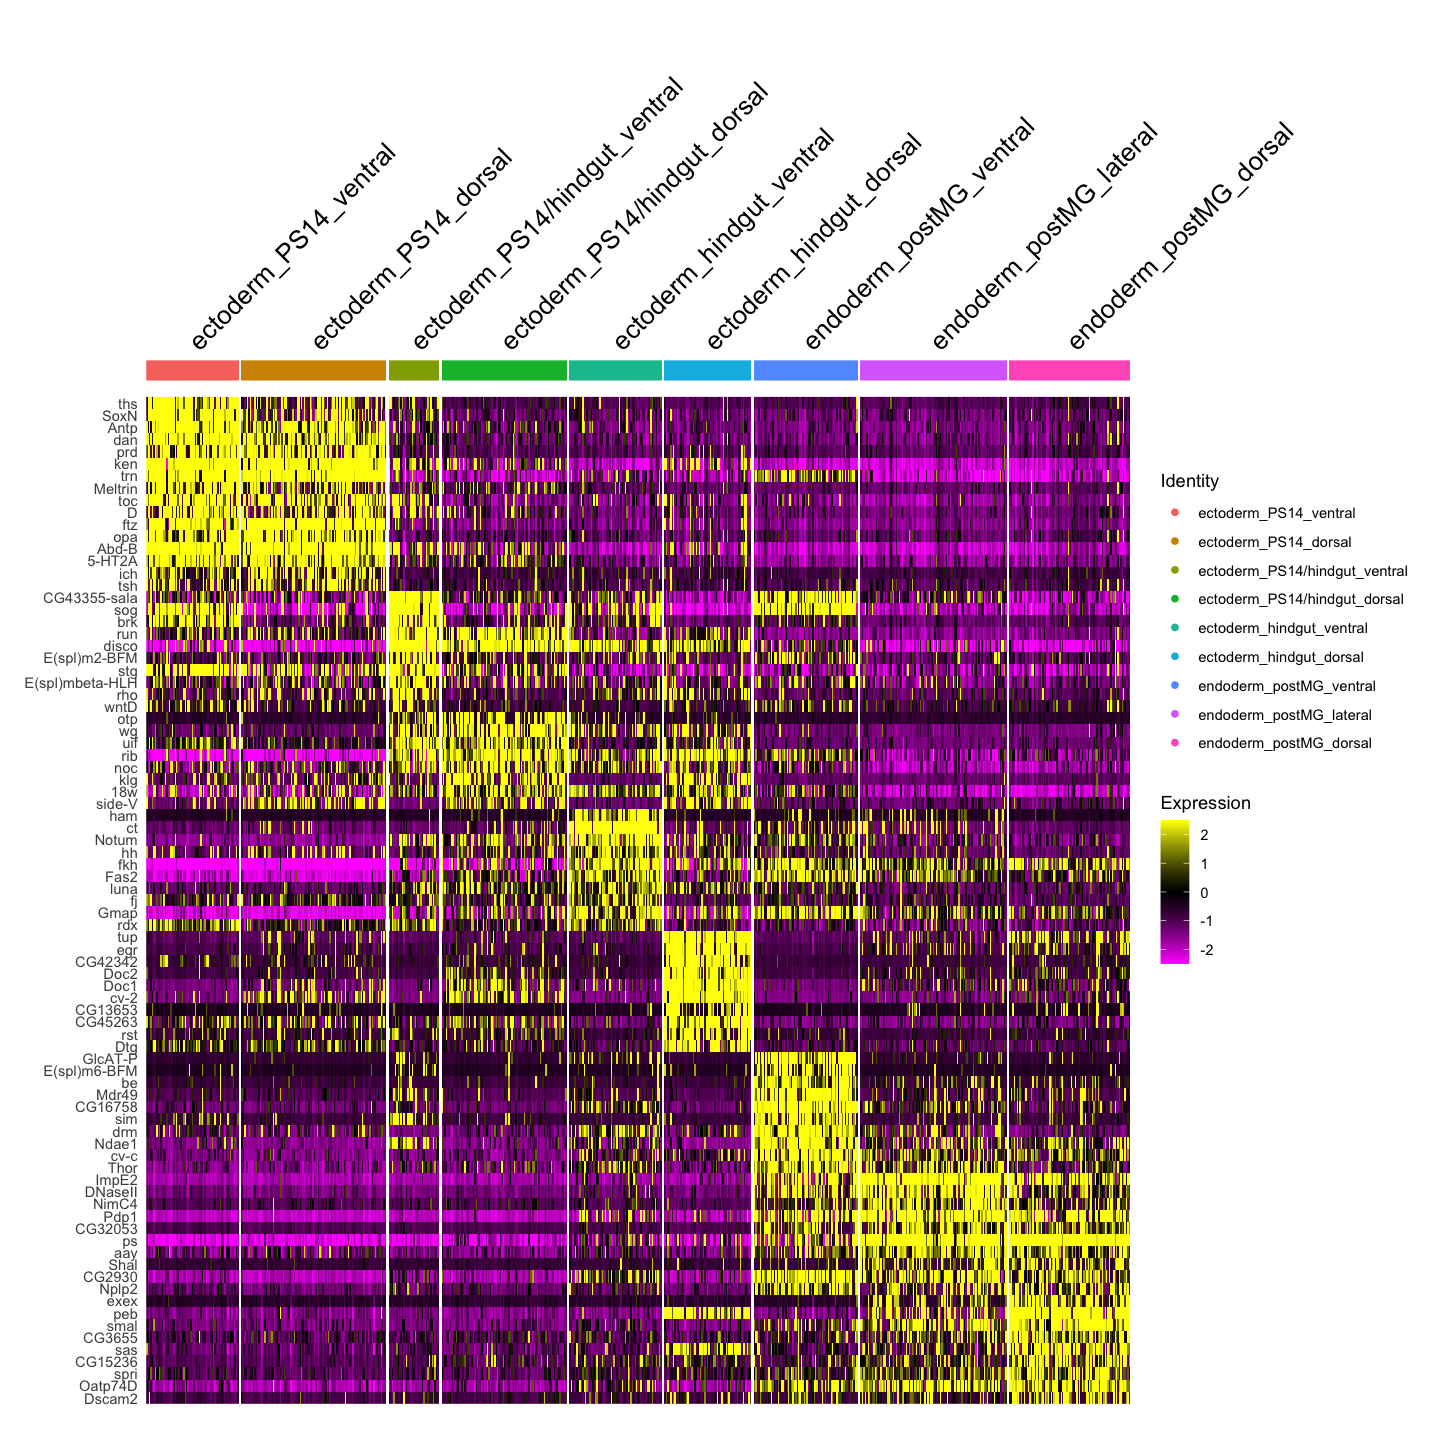

In [21]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))

Saving 7 x 7 in image



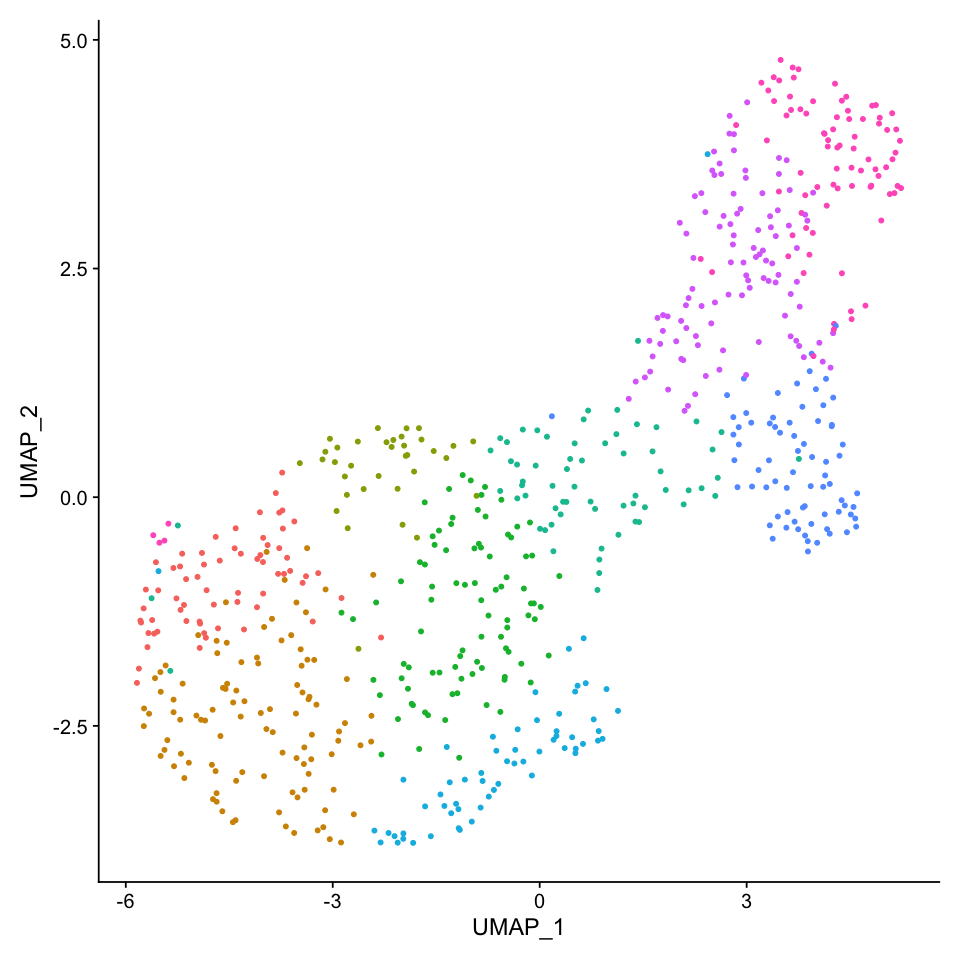

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/05_post_subclutering_Set2/post_umap1.eps", dpi = 300)

Saving 7 x 7 in image



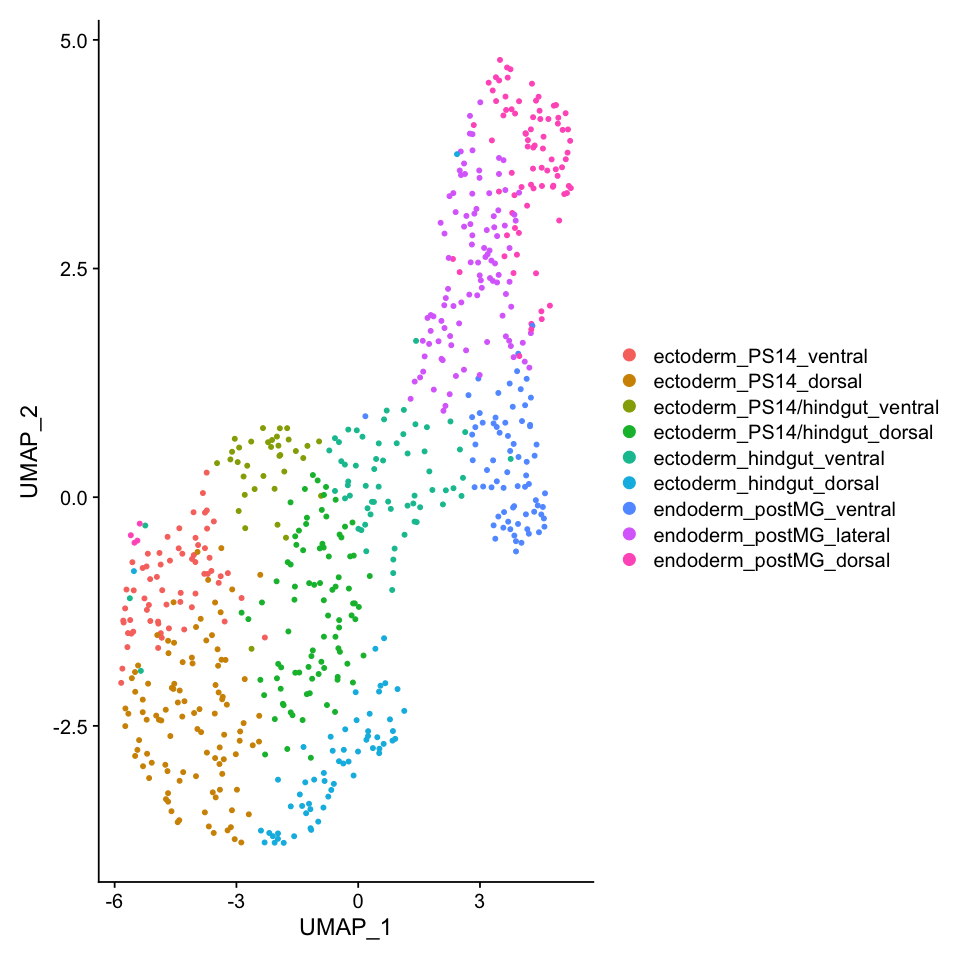

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/05_post_subclutering_Set2/post_umap2.eps", dpi = 300)

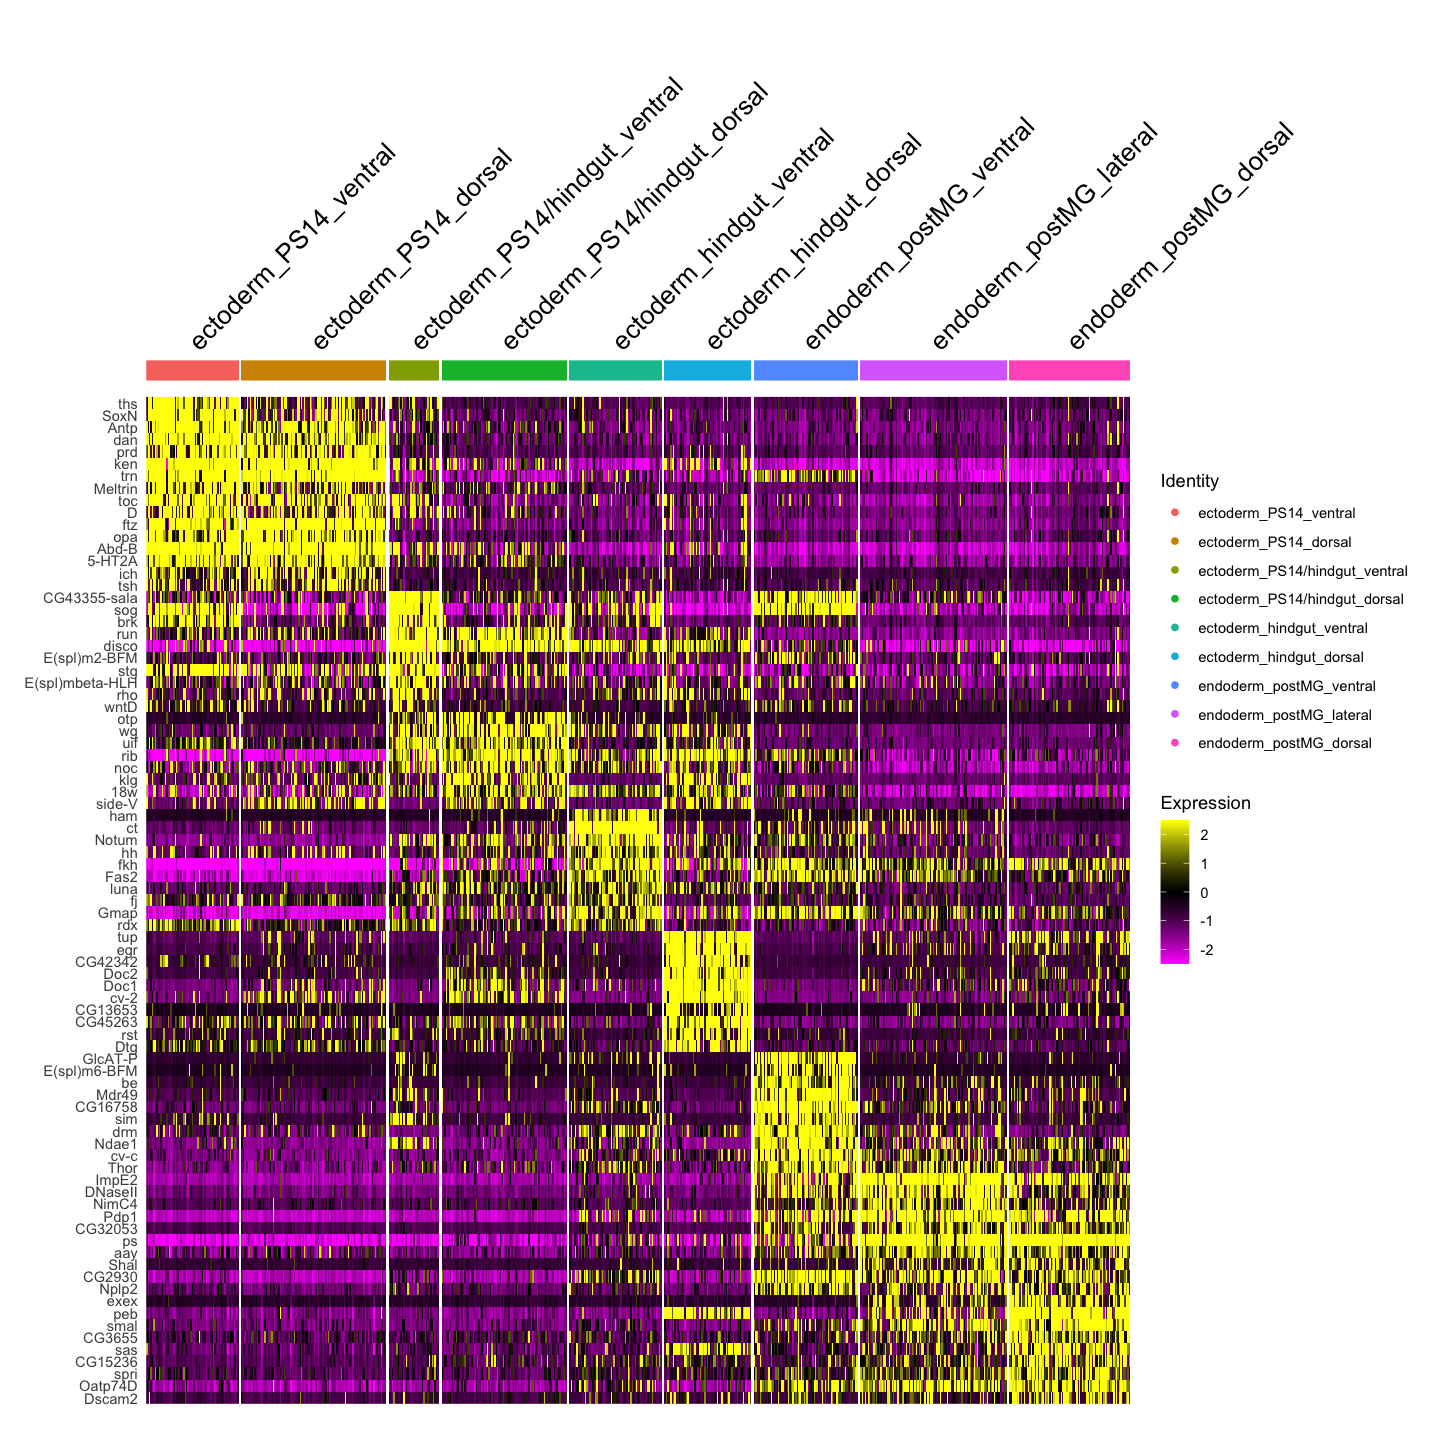

In [24]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.post, features = c(all.markers.post.top10$gene))
fig
ggsave(fig, file = "./figures/05_post_subclutering_Set2/post_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [25]:
seu.others <- subset(seu_HQC, cells=colnames(seu.post), invert=TRUE)
seu.others$manual_ID <- 'others'
seu.result <- merge(x=seu.post, y=seu.others)
seu_HQC$manual_ID <- as.data.frame(seu.result$manual_ID)

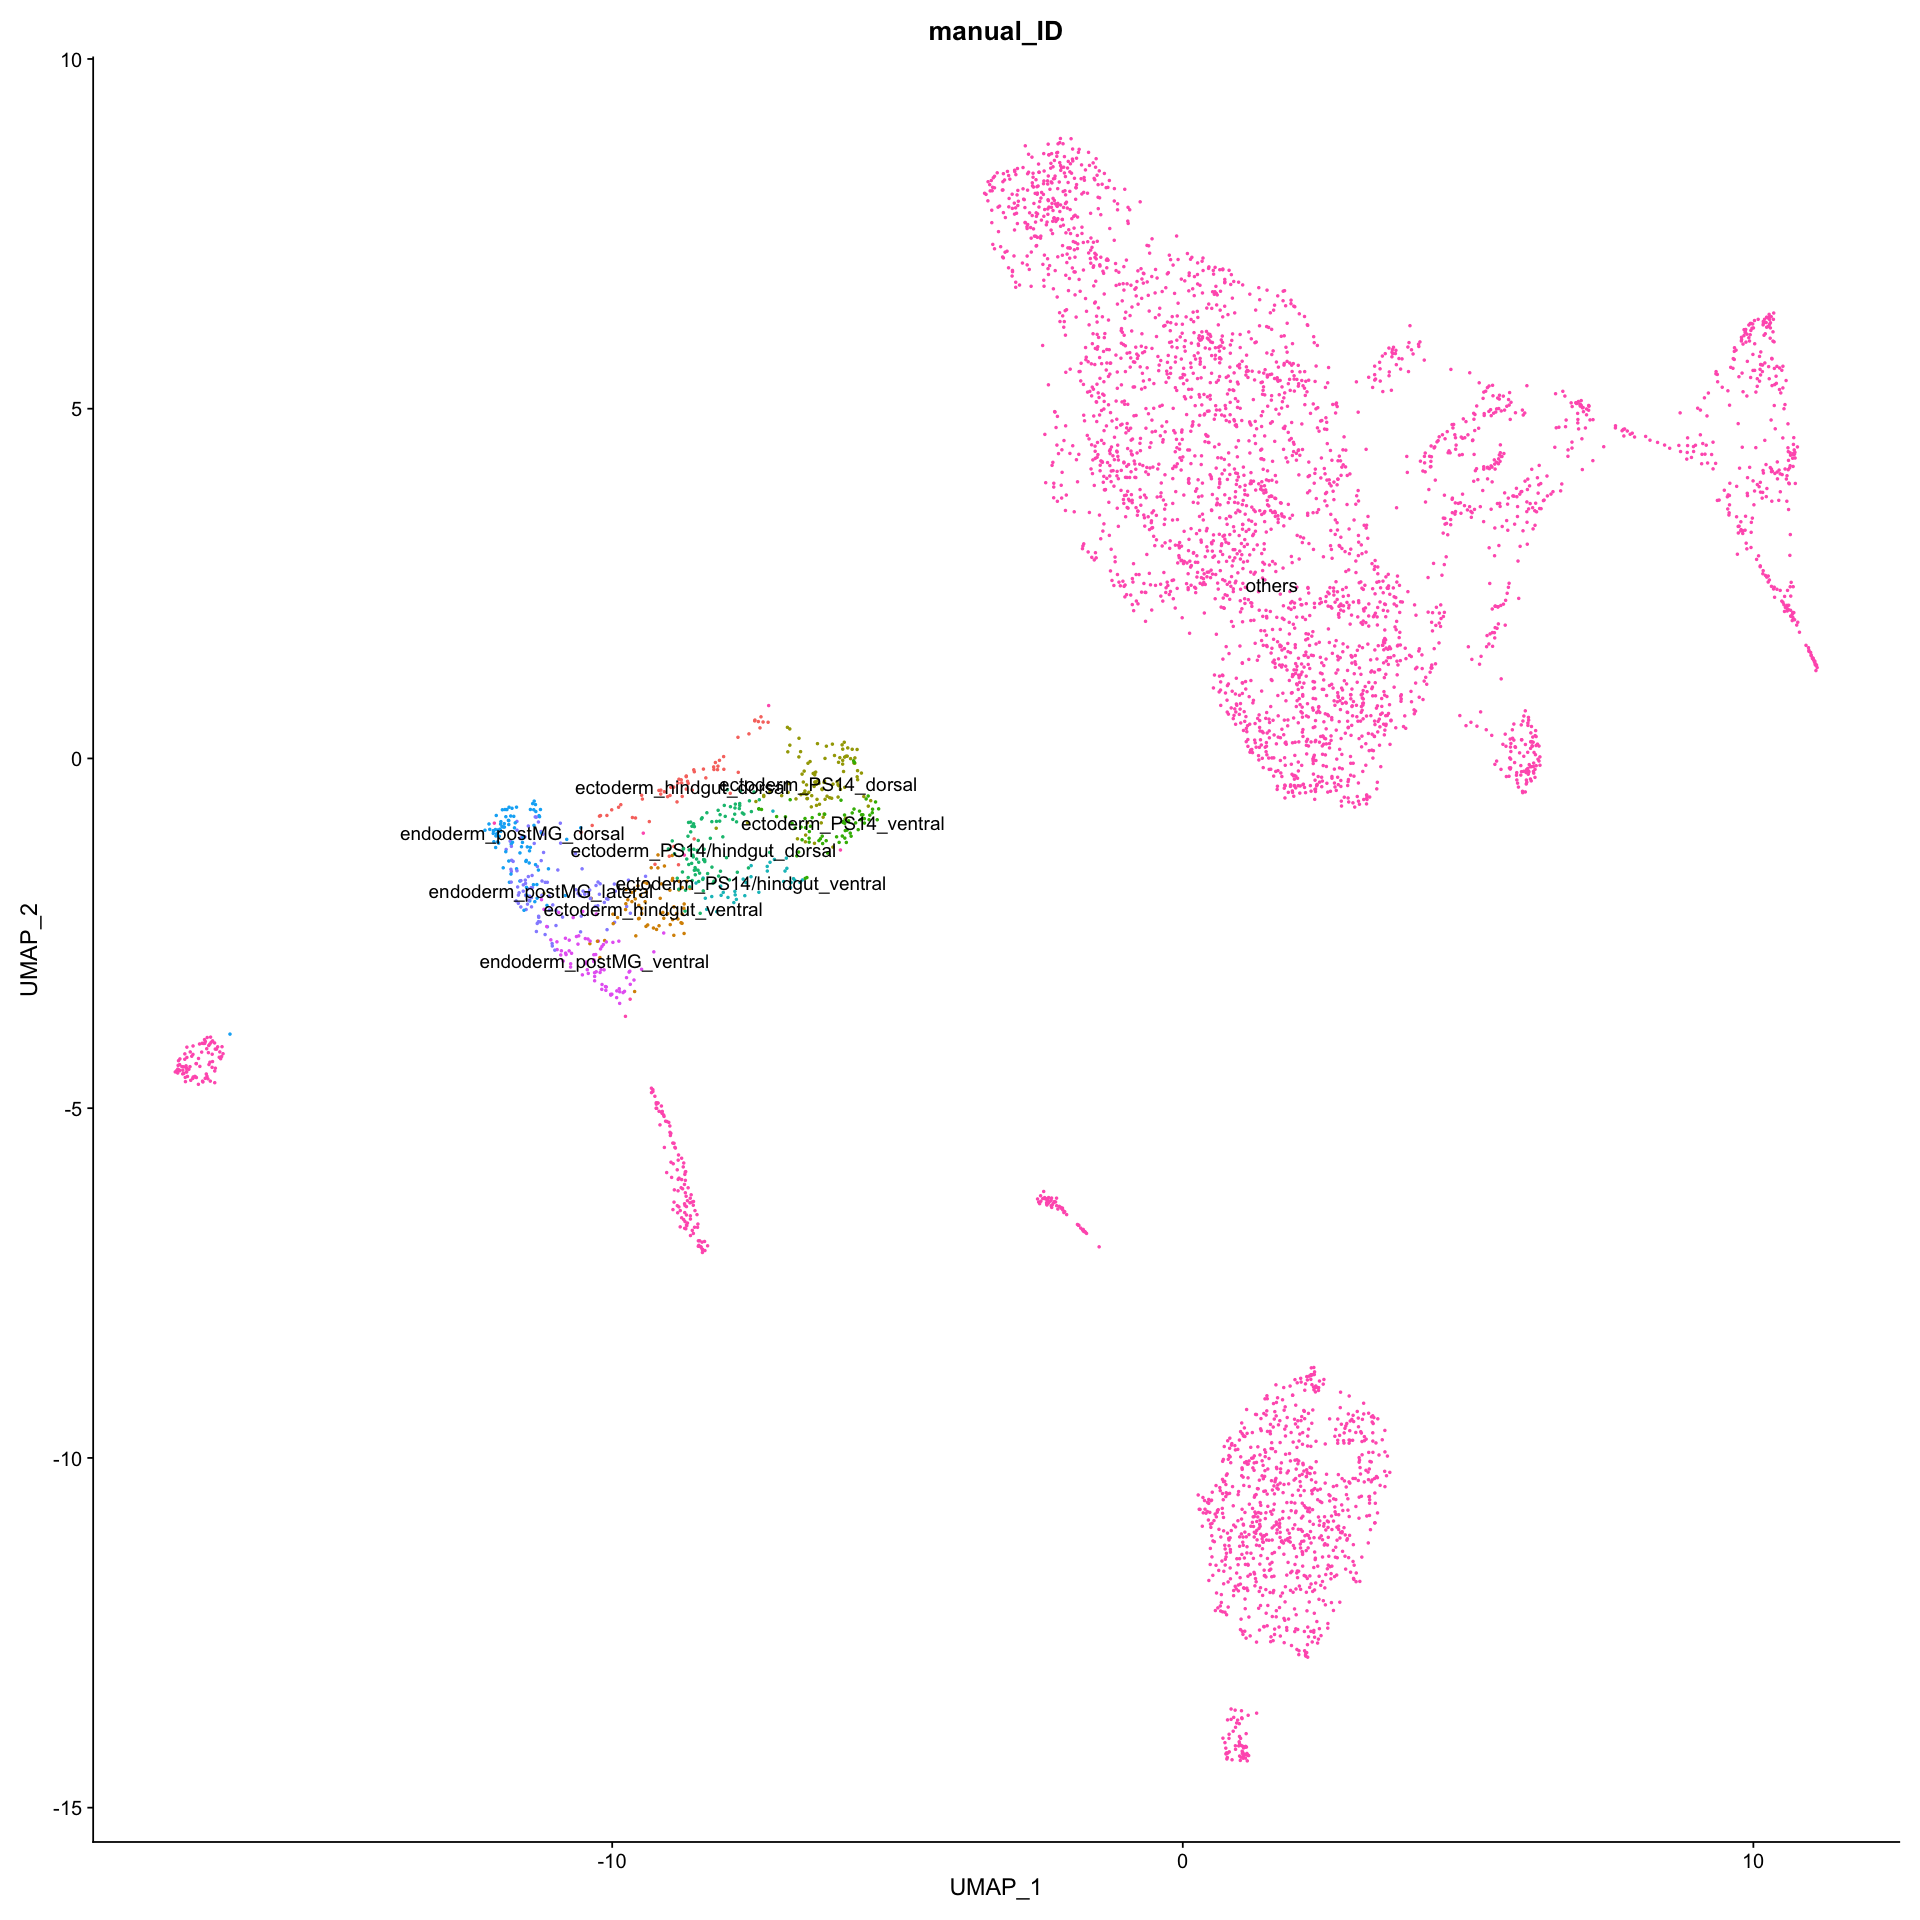

In [26]:
options(repr.plot.width=16, repr.plot.height=16)
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, group.by = 'manual_ID') + NoLegend()

In [27]:
saveRDS(object = seu.post, file = '../../data/seurat_object/Set2/subclustering/seu_post_endo_subclustered.obj')

In [28]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv